<a href="https://colab.research.google.com/github/rafaelnduarte/Spotify_Mood_Playlist/blob/master/Biased_Random_Mood_Playlist_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify - Mood Playlist

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)


According to their own website, [Spotify](https://www.spotify.com) is a digital music, podcast, and video streaming service that gives you access to millions of songs and other content from artists all over the world.

<center><img width="60%" src="http://www.luminmusic.com/images/streaming-icon-spotify.png"></center>

Launched on October 7, 2008, the Spotify platform provides access to over 50 million tracks. Users can browse by parameters such as artist, album, or genre, and can create, edit, and share playlists. 

Spotify is available in most of Europe and the Americas, Australia, New Zealand, and parts of Africa and Asia, and on most modern devices, including Windows, macOS, and Linux computers, and iOS, and Android smartphones and tablets. 

As of October 2019, the company had 248 million monthly active users, including 113 million paying subscribers.

### AI and Data Science

Like most modern technology companies, **Data Science** plays a big role. Since its goal is to connect artists and their audience, recommendation systems play a big role, and you can experience that every time you use the app.
The Discovery Weekly, Daily Mixes, and our Yearly Spotify Wrapped are some of the examples we can name.

Have you ever searched for a song and ended up finding lots of similar songs you loved and saved instantly? That's also their algorithm at work.

### The Project

Being an avid Spotify user myself, there's one feature I think is lacking. I like to call it **Mood Playlist**, which would be some kind of *Biased Random* mode.

Whenever you're listening to your saved songs and you want to shake things up a little, it's a great idea to turn on Random mode. It really is random, and sometimes that's really what you want.

However, sometimes you just want to **set the mood** for the songs to be played. That's exactly what this feature would do. You select a song, hit the mode, and Spotify queues up the most related songs, in order to keep up with your mood.

Imagine you're on a dinner date and want to listen to those romantic songs you have saved. Of course, you haven't prepared a playlist beforehand. All you have to do is select "The way you look tonight", switch **Mood Playlist** on, and it will play all of those songs that are similar to the first one you selected.

> The goal of this project is to explore the data, understand the correlations, and come up with an algorithm that would serve as the basis for the creation of the **Mood Playlist** feature.

To do that, we'll be using a dataset obtained by me using the [Spotify API](https://developer.spotify.com/). A notebook on the process to get the data from Spotify using the Python Library [Spotipy](https://spotipy.readthedocs.io/en/latest/) can be found [here](https://colab.research.google.com/drive/1-c-F9BTy2W2PkuArX0S4Rbp_kNhwB8rI).

Also, kudos to [tomigelo](https://www.kaggle.com/tomigelo/spotify-audio-features), for coming up with the code I used to retrieve the data from Spotify.


### Machine Learning and Validation

For the situation we're facing, we need to categorize our data points into ***clusters***, and then use these to gather these data points, which in our case are songs, into a sequence of songs, that will become our **Mood Playlist**.

Using as reference [this post](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68) on the [Towards Data Science](https://towardsdatascience.com/) blog:
> "*Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields.*

Among the top Clustering techniques, Towards Data Science mentions:
* K-Means Clustering
* Mean-Shift Clustering
* Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
* Expectation–Maximization (EM) Clustering using Gaussian Mixture Models (GMM)
* Agglomerative Hierarchical Clustering

Moving forward we'll analyze the pros and cons of each one of those, and figure out which one will yield the best results for our project.

But first, let's get started and explore our data a little bit to better understand what we're dealing with.

In [0]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Variable Dictionary
These are the descriptions of the features provided by [Spotify](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) on their Spotify for Develepors documentation:

* artist_name - Name of the artist
* track_name - Name of the track
* track_id - Id of the track
* popularity - Popularity of the track (The higher, the more popular it is)
* danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The distribution of values for this feature look like this:<p><img alt='danceability' height="150" src="https://developer.spotify.com/assets/audio/danceability.png" align="center" hspace="10px" vspace="0px"></p>
* energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The distribution of values for this feature look like this: <p><img alt='energy' height="150" src="https://developer.spotify.com/assets/audio/energy.png" align="center" hspace="10px" vspace="0px"></p>
* key - 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
* loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/loudness.png" align="center" hspace="10px" vspace="0px"></p>
* mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness - 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/speechiness.png" align="center" hspace="10px" vspace="0px"></p>
* acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/acousticness.png" align="center" hspace="10px" vspace="0px"></p>
* instrumentalness - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/instrumentalness.png" align="center" hspace="10px" vspace="0px"></p>
* liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/liveness.png" align="center" hspace="10px" vspace="0px"></p>
* valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/valence.png" align="center" hspace="10px" vspace="0px"></p>
* tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The distribution of values for this feature look like this: <p><img height="150" src="https://developer.spotify.com/assets/audio/tempo.png" align="center" hspace="10px" vspace="0px"></p>
* duration_ms - The duration of the track in milliseconds.
* time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [2]:
# importing the data
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Spotify_Mood_Playlist/master/data/brazil_data.csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


In [3]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		9239
Columns:	17


With almost 10.000 entries, we should have more than enough data for an insightful project.

Let's check for missing values:

In [4]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9239 entries, 0 to 9238
Data columns (total 17 columns):
artist_name         9239 non-null object
track_name          9239 non-null object
track_id            9239 non-null object
popularity          9239 non-null int64
danceability        9239 non-null float64
energy              9239 non-null float64
key                 9239 non-null int64
loudness            9239 non-null float64
mode                9239 non-null int64
speechiness         9239 non-null float64
acousticness        9239 non-null float64
instrumentalness    9239 non-null float64
liveness            9239 non-null float64
valence             9239 non-null float64
tempo               9239 non-null float64
duration_ms         9239 non-null int64
time_signature      9239 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 1.3+ MB


In [5]:
# statistical distribution of the data
df.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9.239000e+03,9239.000000
mean,45.143955,0.577666,0.521246,5.202403,-10.764562,0.632644,0.097075,0.464533,0.190364,0.216142,0.479810,119.459796,2.057333e+05,3.879532
std,26.414499,0.201068,0.291566,3.601579,7.986380,0.482111,0.106355,0.371628,0.349610,0.207558,0.259899,30.566493,1.098136e+05,0.519059
min,0.000000,0.000000,0.000020,0.000000,-45.136000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.262700e+04,0.000000
25%,19.000000,0.426000,0.254000,2.000000,-15.290000,0.000000,0.039900,0.097500,0.000000,0.096800,0.265000,95.731500,1.574850e+05,4.000000
50%,52.000000,0.609000,0.583000,5.000000,-7.423000,1.000000,0.053000,0.393000,0.000007,0.126000,0.480000,121.075000,1.892680e+05,4.000000
75%,65.000000,0.734000,0.764500,8.000000,-5.160000,1.000000,0.099700,0.881000,0.076200,0.249500,0.688000,138.102500,2.268965e+05,4.000000
max,100.000000,0.983000,1.000000,11.000000,2.036000,1.000000,0.950000,0.996000,0.995000,1.000000,0.989000,218.365000,1.493227e+06,5.000000


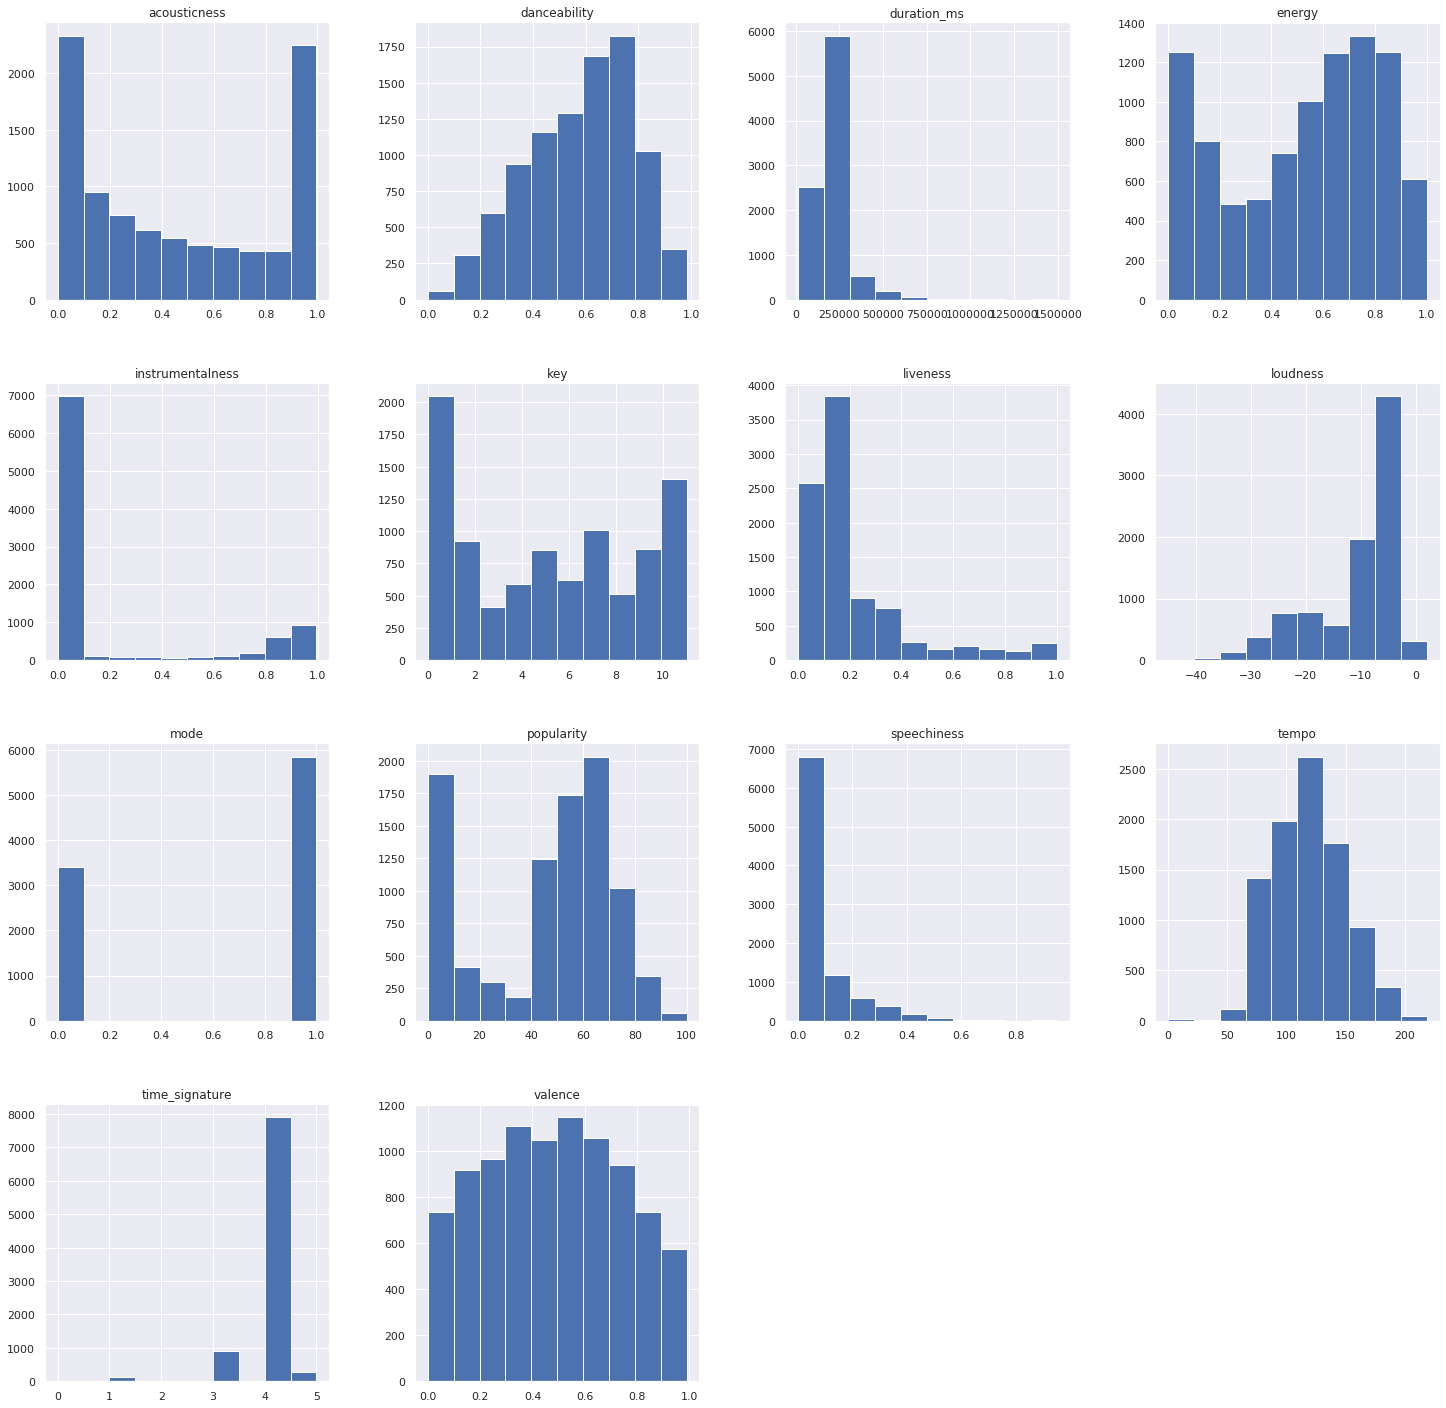

In [6]:
# plotting histograms
df.hist(figsize=(25,25));

We can see some outliers in the distribution, but later on we'll be working on a smaller portion of our dataset, and we'll leave the preprocessing part to that moment.

Now that we've checked the statistical distribution of the data, it's time to check for unique values:

In [7]:
# unique values
print("\nUNIQUE VALUES:")
print(df.nunique().sort_values())


UNIQUE VALUES:
mode                   2
time_signature         5
key                   12
popularity           101
danceability         906
speechiness         1199
valence             1299
liveness            1391
energy              1656
acousticness        2183
instrumentalness    2544
artist_name         2660
loudness            7148
tempo               8127
duration_ms         8434
track_name          9018
track_id            9239
dtype: int64


In [8]:
# statistical distribution of categorical values
df.describe(include="O")

,artist_name,track_name,track_id
count,9239,9239,9239
unique,2660,9018,9239
top,Ludwig van Beethoven,Forever,5w8wL9IpVlOerzOzOvkjvG
freq,1200,6,1


Ok, something is off. These are great musicians indeed. However, if you've ever been to Brazil, you know that's not what people listen to the most.

The rise of "Productivity" playlists full of classical songs that help you concentrate, plus the sheer volume of songs theses artists made, can easily explain their appearance. Beethoven alone appeared 1200 times!

To better understand what Brazilians really like, we'll have to shorten our playlist. In order to get the absolute creme de la creme of Brazilian music, let's analyze the top 150 songs.

Popularity might not be extremely relevant for our feature/model, but it's the most important variable of this dataset. 

With that in mind, let's see what makes a song popular on Spotify in Brazil:

In [9]:
# checking most recurrent artists in Brazil
n = 10
print("Most Famous Artists in Brazil")
df['artist_name'].value_counts()[:n]

Most Famous Artists in Brazil


Ludwig van Beethoven        1200
Johann Sebastian Bach        300
Wolfgang Amadeus Mozart      150
Frédéric Chopin               83
Armin van Buuren              64
Pyotr Ilyich Tchaikovsky      47
Steven Universe               46
Beyoncé                       44
Wesley Safadão                41
Os Barões Da Pisadinha        41
Name: artist_name, dtype: int64

Alright. These are great musicians indeed. However, if you've ever been to Brazil, you know that's not what people listen to the most.

The rise of "Productivity" playlists full of classical songs that help you concentrate, plus the sheer volume of songs theses artists made, can easily explain their being among the top artists.

Beethoven appeared 1200 times!

To better understand what Brazilians really like, let's take a look at the top 150 songs. Still a relevant number, but a lot more focused when it comes to results.

In [0]:
# creating a new dataset with the top 150 songs
df_top = df.copy()
df_top = df_top.iloc[:150]

In [11]:
df_top.head(10)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.1820,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.9590,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.1120,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.3800,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.3330,0.714,152.370,181930,4
5,Felipe Original,Hit Contagiante,5dKesZwp6deuhEeW8F1UEi,84,0.819,0.684,6,-7.169,0,0.1190,0.1320,0.000000,0.0942,0.959,170.187,137125,4
6,Lexa,Chama Ela (feat. Pedro Sampaio),14kRWkCWBYfQqILflEcpSJ,84,0.888,0.841,6,-1.933,1,0.1470,0.4600,0.000091,0.0568,0.964,149.994,120200,4
7,Jorge & Mateus,Tijolão - Ao Vivo,6QwFUcPc5nhsqZuhXUYtV7,83,0.637,0.877,4,-3.680,0,0.1980,0.4690,0.000000,0.3430,0.691,118.889,175219,4
8,Anitta,Combatchy (feat. MC Rebecca),2bPtwnrpFNEe8N7Q85kLHw,83,0.826,0.730,1,-3.032,1,0.0809,0.3830,0.000374,0.0197,0.605,150.134,157600,4
9,Zé Neto & Cristiano,Ferida Curada,1U3tv41tFRgOfbytpuYQrR,83,0.490,0.845,2,-3.359,1,0.0973,0.4900,0.000000,0.2130,0.548,146.105,159164,4


In [12]:
# statistical distribution of categorical values
df_top.describe(include="O")

,artist_name,track_name,track_id
count,150,150,150
unique,94,150,150
top,Marília Mendonça,Até que enfim - Ao vivo,5n8Y78Pl5q8lqS7sJP61qw
freq,12,1,1


In [13]:
# checking most recurrent artists in Brazil
n = 10
print("Most Famous Artists in Brazil")
df_top['artist_name'].value_counts()[:n]

Most Famous Artists in Brazil


Marília Mendonça       12
MC Kevin o Chris        7
Gusttavo Lima           5
Zé Neto & Cristiano     4
Vitão                   4
Matheus & Kauan         3
Pedro Sampaio           3
Anitta                  3
Pk                      3
Diego & Victor Hugo     3
Name: artist_name, dtype: int64

In [14]:
# top songs from the top artist
df_top.loc[df['artist_name'] == 'Marília Mendonça']

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.0,0.959,0.658,131.573,147748,4
18,Marília Mendonça,Serenata - Ao Vivo,5fY9bVl1Wj4PIM3wnduWop,81,0.711,0.711,4,-5.691,1,0.0896,0.1030,0.0,0.971,0.743,131.813,156371,4
25,Marília Mendonça,Todo Mundo Vai Sofrer - Ao Vivo,4E6RdcCWMiHTu7zy1VTNDo,81,0.621,0.743,3,-3.864,1,0.0738,0.2810,0.0,0.411,0.581,111.454,154661,4
26,Marília Mendonça,Bebi Liguei - Ao Vivo,3RbXsVQr4jeTxvT35Hssq3,80,0.603,0.804,0,-4.253,1,0.1980,0.3620,0.0,0.743,0.682,153.883,159780,4
66,Marília Mendonça,Intenção - Ao Vivo,1qy7aOHnfnOMJoT1fhoLYG,76,0.613,0.611,6,-6.587,0,0.0843,0.3760,0.0,0.910,0.628,139.474,202767,4
78,Marília Mendonça,Ciumeira - Ao Vivo,7D5F5BzIon5zhzQrOU2pdN,75,0.741,0.813,11,-4.830,0,0.0452,0.2040,0.0,0.797,0.765,123.842,190084,4
84,Marília Mendonça,Apaixonadinha - Ao Vivo,0rUL7vUZmCKxB0gS83W3aM,75,0.663,0.771,0,-4.665,1,0.2060,0.2160,0.0,0.713,0.778,166.026,180921,4
98,Marília Mendonça,Bebaça - Ao Vivo,6YjyT6MEMsMc41NNWk2dYg,74,0.663,0.884,2,-3.400,0,0.0716,0.6520,0.0,0.156,0.875,172.059,175203,4
105,Marília Mendonça,Sem Sal - Ao Vivo,0EZuXcsnjEmGuRYdFdcctX,74,0.559,0.844,0,-3.685,1,0.1240,0.1120,0.0,0.935,0.823,139.385,162751,4
110,Marília Mendonça,Obrigado por Estragar Tudo - Ao Vivo,4a5GPCo8oX4vvaRkciKlih,74,0.438,0.728,2,-4.934,1,0.1230,0.6060,0.0,0.915,0.609,152.760,176667,4


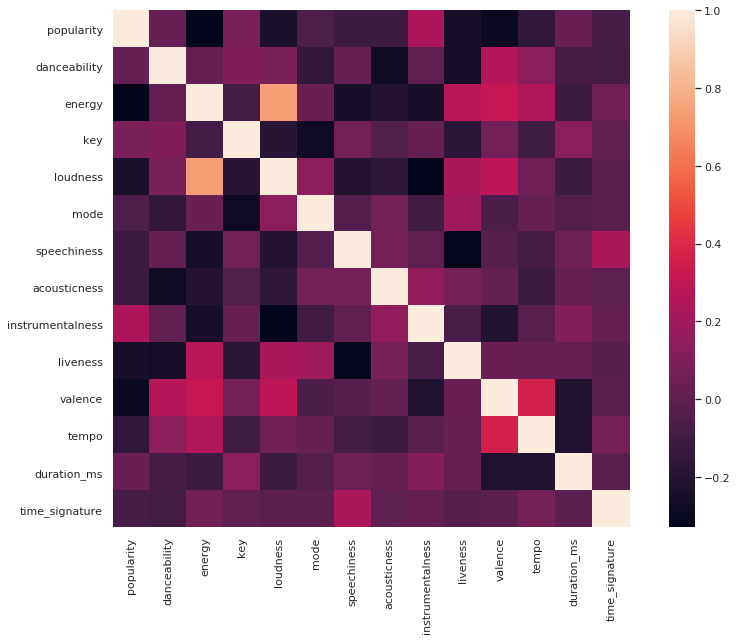

In [15]:
# creating a correlation matrix
corr = df_top.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()


Now that we've seen the correlation between all the variables, let's plot a more focused heatmap order by the 10 most correlated variables, before we come to any conclusions.

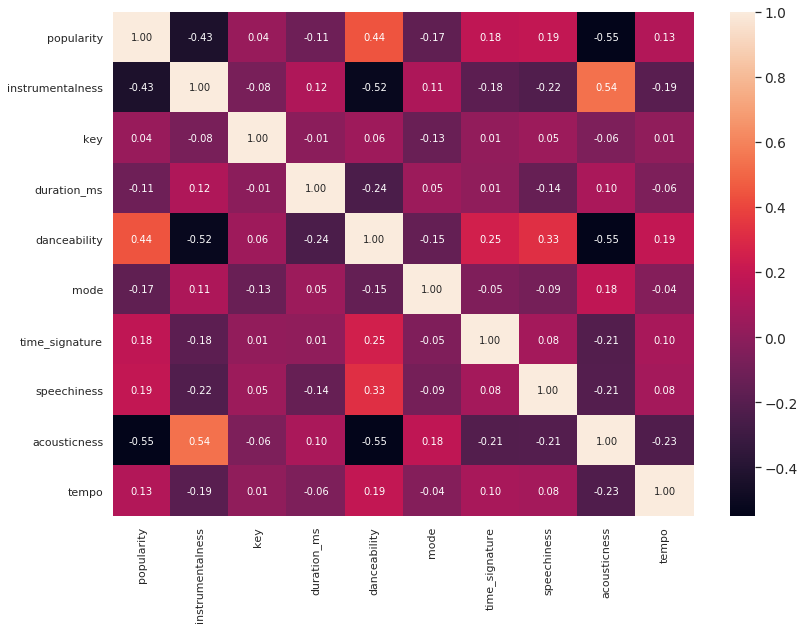

In [16]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()


**Conclusions**

* Strong negative Correlation between instrumentalness and popularity. This is really interesting and proves that first sample of most famous artists didn't represent brazilians' taste in music.
* Key doesn't necessarily mean popularity, but genres like "sertanejo" (Brazilian country music) often have songs in similar keys. 
* Negative correlation between duration and popularity, which suggests that longer songs are less prone to being popular.
* Danceability really says a lot. Brazil is famous for its cheerful songs, like funk, sertanejo, among others. It really makes a lot of sense that this is a factor in Brazil.
* Acousticness has a negative correlation to popularity. However, it doesn't necessarily mean acoustic songs are less prone to being popular. Usually the fully mastered and well produced songs are the ones most heavily advertised by the artists and spotify themselves, which results in the studio versions becoming more popular. We would have to investigate the number of acoustic songs actually made/posted on Spotify, to see if this correlation really have a cause/effect relationship.



### Juicy Features
Now that we have identified some interesting features, let's take a closer look at them, and their relationship with the popularity of the songs.

> We want to take a closer look at **Acousticness, Instrumentalness, Danceability and Duration** and see how they influence popularity.

For that, let's plot some **Scatter Plots** and see what they look like.

To make the information more digestable, let's plot them in pairs:

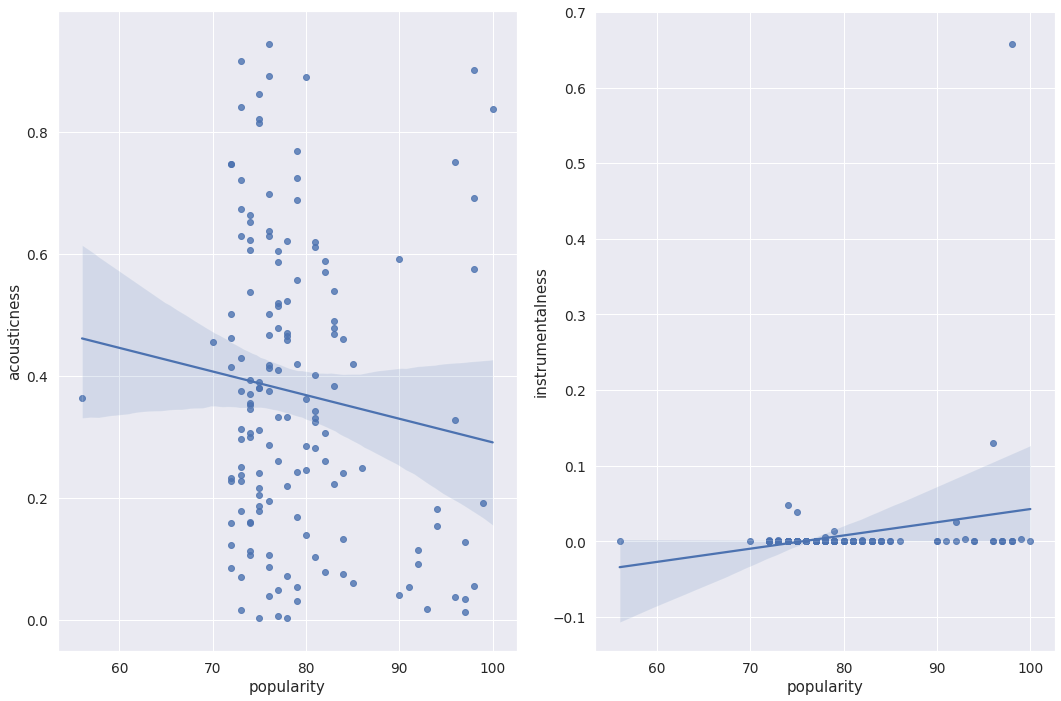

In [17]:
# scatter plots with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df_top['popularity'], y=df_top['acousticness'], ax=ax1);
sns.regplot(x=df_top['popularity'], y=df_top['instrumentalness'], ax=ax2);
plt.tight_layout()

With these visualizations it's easier to see what the heatmap had shown us before:
* Acousticness decreases as Popularity increases
* The majority of the songs are at 0 or really close to it when it comes to instrumentalness. However, there is one song that really stands out, and that data point, alongside another one that is a little above the 0 line, tilt the line upwards.

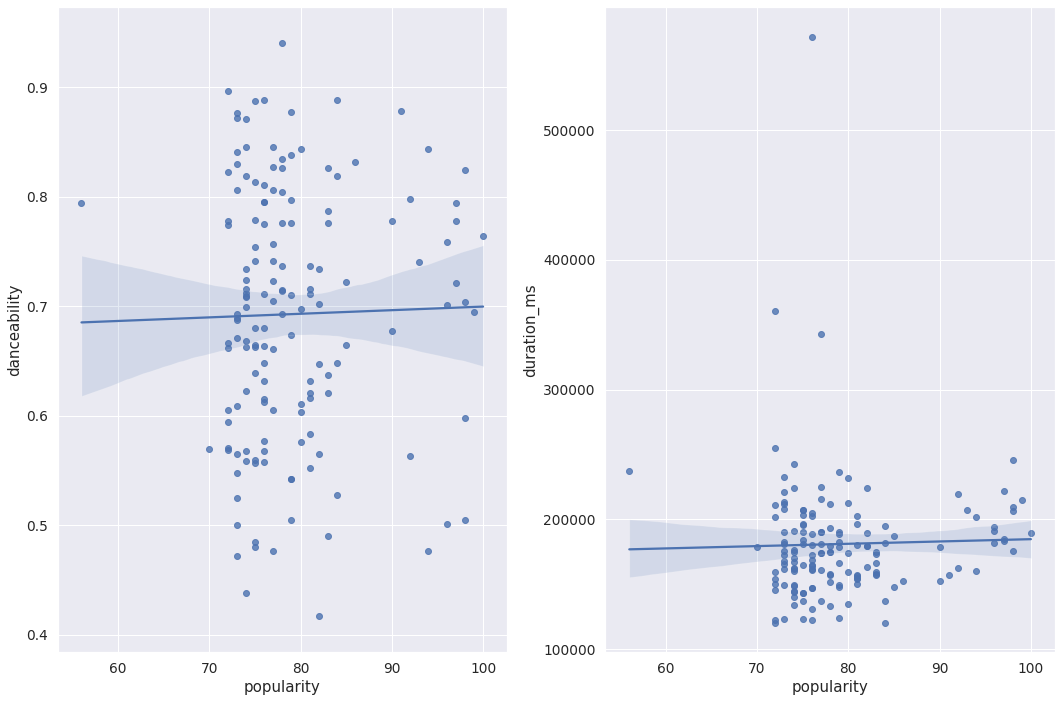

In [18]:
# scatter plot with linear regression line
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15,10));
sns.regplot(x=df_top['popularity'], y=df_top['danceability'], ax=ax1)
sns.regplot(x=df_top['popularity'], y=df_top['duration_ms'], ax=ax2)
plt.tight_layout()

Let's take a look at Danceability and Duration
* First of all, these lines are a lot more flat.
* We can really see that the majority of the songs over 85-ish in popularity are highly "danceable", which confirms their brazilian identity, as well as the brazilian preference for more cheerful songs.
* When it comes to duration, apart from some clear outliers, it doesn't seem to vary a lot. However, this is when our sample size starts to become dangerous. It's too small a sample to be sure about this, but the top 150 songs seem to have about the same duration time.

### Machine Learning
Now that we've analyzed our dataset and learned a little bit more about the Brazilian music scene, it's time to do what we are here for: Machine Learning.

Spotify uses an extremely well-built recommendation system. They've been working on it for years, thoroughly developing their algorithms and testing countless hypotheses with teams of top of the class Data Scientists. It would be naive of me to even mention that my project can be as good as what they do. But that's not the goal.

> The goal is to come up with a concept, that could be polished into a feature in their environment, to be further tested and improved, aiming to deliver a more complete experience for their users.

For that, we'll use a simple `Clustering` algorithm, to help us organize and recommend the best songs for our users.

In [0]:
from sklearn.cluster import KMeans
import numpy as np

from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Before starting working on our model, let's make a copy of our dataset, to make sure we don't have any problems in case something goes wrong.

In [0]:
# creating a copy of the dataset
df_cluster = df.copy()
df_cluster = df_cluster.iloc[:300]

In [0]:
# creating a dataframe without the categorical features
X = df_cluster.iloc[:, [3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values

In [22]:
print(X.shape)
df_cluster.head()

(300, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4


### Elbow Method - Finding out the right number of clusters

For KMeans we have to set a number of clusters for our data to be divided in. Since this is, at first, a completely arbitrary task, we have to look for options to make it as precise as possible.

One of the most popular methods to do so is the Elbow Method. Basically, we calculate different scenarios for different numbers of clusters and then plot them in a line. 

> The number we're looking for is the position where the line starts to flatten, making it look like an elbow for the plot. After some testing, I've figured out that 5 clusters yield better results.

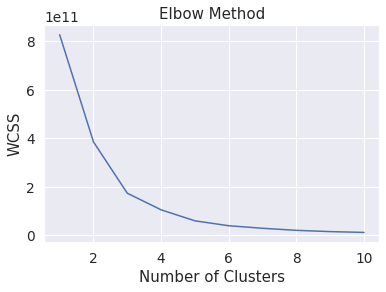

In [23]:
# finding out the proper number of clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Data Preprocessing





In [0]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [0]:
scaled = scaler.fit_transform(X)

### K-Means

In [0]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

In [0]:
from mpl_toolkits.mplot3d import Axes3D

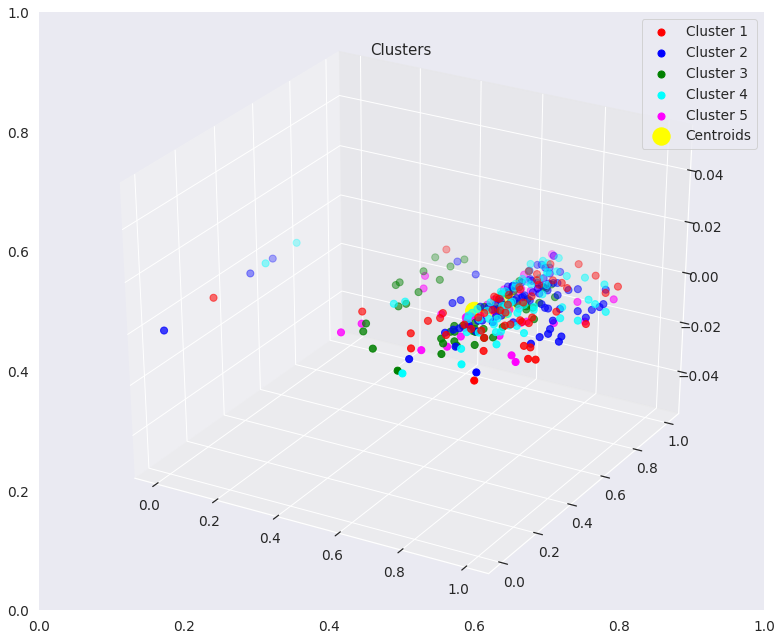

In [28]:
# visualizing clusters
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.show()

In [29]:
# predictions 
y_kmeans

array([1, 2, 1, 4, 3, 1, 3, 4, 0, 0, 2, 1, 4, 3, 3, 3, 0, 1, 2, 2, 3, 3,
       3, 2, 1, 0, 2, 2, 0, 0, 2, 2, 3, 3, 1, 2, 0, 3, 3, 3, 2, 1, 2, 1,
       0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 3, 0, 1, 0, 1, 1, 1, 1, 2, 4, 2, 4,
       1, 0, 4, 4, 0, 4, 3, 3, 0, 2, 1, 0, 1, 1, 4, 3, 3, 1, 2, 2, 3, 3,
       3, 1, 1, 0, 1, 2, 1, 1, 1, 2, 4, 1, 1, 3, 1, 3, 0, 2, 3, 0, 0, 2,
       2, 1, 3, 0, 1, 2, 1, 3, 4, 4, 3, 0, 4, 1, 3, 2, 3, 4, 4, 3, 2, 4,
       3, 0, 3, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 0, 2, 1, 1, 1, 4, 0, 4, 4,
       3, 1, 0, 2, 0, 2, 4, 1, 0, 2, 2, 3, 2, 3, 1, 3, 4, 1, 2, 0, 3, 2,
       2, 0, 2, 0, 4, 2, 3, 3, 0, 4, 3, 1, 3, 1, 1, 2, 0, 3, 1, 0, 1, 2,
       0, 2, 3, 1, 1, 0, 3, 1, 3, 0, 2, 0, 2, 4, 2, 2, 1, 2, 3, 4, 3, 2,
       2, 1, 1, 1, 1, 4, 4, 2, 1, 4, 0, 3, 4, 0, 3, 2, 0, 1, 1, 3, 1, 3,
       0, 3, 4, 3, 0, 4, 1, 4, 1, 3, 3, 2, 2, 1, 4, 1, 4, 3, 1, 2, 3, 3,
       4, 1, 4, 3, 4, 4, 3, 0, 1, 0, 0, 1, 1, 0, 3, 1, 0, 4, 1, 0, 4, 1,
       1, 1, 1, 3, 4, 0, 0, 3, 1, 4, 4, 0, 0, 3], d

In [0]:
# converting preditcions into a df
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

In [31]:
# predictions as a df
print(kmeans.shape)
kmeans.head()

(300, 1)


,k_cluster
0,1
1,2
2,1
3,4
4,3


In [0]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

In [33]:
# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(300, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
0,Dadá Boladão,Surtada - Remix Brega Funk,5F8ffc8KWKNawllr5WsW0r,86,0.832,0.550,5,-7.026,0,0.0587,0.2490,0.000008,0.182,0.881,154.064,152784,4,1
1,Marília Mendonça,Supera - Ao Vivo,3GmJxfnUDrIs1iCfKUELFz,85,0.665,0.743,4,-4.434,1,0.0567,0.0604,0.000000,0.959,0.658,131.573,147748,4,2
2,MC Du Black,Gaiola É o Troco,3Uq45ipGutypFPmETfaoaH,85,0.722,0.840,10,-3.240,0,0.0785,0.4200,0.000000,0.112,0.851,150.108,187246,4,1
3,Anitta,Some que ele vem atrás,2qD7VoDYcrAPY0cVEfpsR5,84,0.648,0.795,0,-5.536,0,0.1700,0.0748,0.000000,0.380,0.598,180.043,194771,4,4
4,Jorge & Mateus,Cheirosa - Ao Vivo,2PWjKmjyTZeDpmOUa3a5da,84,0.528,0.870,11,-3.123,1,0.0851,0.2400,0.000000,0.333,0.714,152.370,181930,4,3


In [34]:
# checking for null
(df_cluster.isnull().sum()/ df_cluster.shape[0]).sort_values(ascending=False)

k_cluster           0.0
time_signature      0.0
track_name          0.0
track_id            0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
artist_name         0.0
dtype: float64

In [35]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
0    74.584906
1    73.975000
3    73.268657
4    72.434783
2    67.888889
Name: popularity, dtype: float64

In [36]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

1    80
3    67
2    54
0    53
4    46
Name: k_cluster, dtype: int64

In [42]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 0][:5]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,k_cluster
8,Anitta,Combatchy (feat. MC Rebecca),2bPtwnrpFNEe8N7Q85kLHw,83,0.826,0.730,1,-3.032,1,0.0809,0.383,0.000374,0.0197,0.605,150.134,157600,4,0
9,Zé Neto & Cristiano,Ferida Curada,1U3tv41tFRgOfbytpuYQrR,83,0.490,0.845,2,-3.359,1,0.0973,0.490,0.000000,0.2130,0.548,146.105,159164,4,0
16,Luan Santana,quando a bad bater - ao vivo,1nVIlX3h3Ds9bH6JMQopIU,82,0.647,0.787,1,-4.767,1,0.0413,0.307,0.000000,0.5320,0.535,128.121,179722,4,0
25,Marília Mendonça,Todo Mundo Vai Sofrer - Ao Vivo,4E6RdcCWMiHTu7zy1VTNDo,81,0.621,0.743,3,-3.864,1,0.0738,0.281,0.000000,0.4110,0.581,111.454,154661,4,0
28,Dj Guuga,Vidrado Em Você,2kOmW169C7UV4SZDN9u0YO,80,0.843,0.925,2,0.302,1,0.0997,0.139,0.000008,0.1090,0.590,159.926,134769,4,0


In [41]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 


popularity                                                         \
               count       mean        std   min    25%   50%    75%    max   
k_cluster                                                                     
0               53.0  74.584906  15.935488   0.0  70.00  75.0  83.00   99.0   
1               80.0  73.975000  17.797721   0.0  70.00  74.5  82.25   98.0   
2               54.0  67.888889  13.108641  40.0  68.25  72.5  77.00   85.0   
3               67.0  73.268657  15.822483   0.0  69.50  74.0  79.50  100.0   
4               46.0  72.434783  12.069525  43.0  69.00  71.5  76.00   98.0   

          danceability                                                       \
                 count      mean       std    min      25%     50%      75%   
k_cluster                                                                     
0                 53.0  0.673830  0.140886  0.367  0.56500  0.6640  0.78300   
1                 80.0  0.715937  0.127339  0.265  0.63725  0.7355  0.80725   
2                 54.0  0.640833  0.123547  0.333  0.55325  0.6660  0.73700   
3                 67.0  0.712313  0.126035  0.327  0.62200  0.7020  0.80200   
4                 46.0  0.672391  0.126888  0.427  0.59850  0.6735  0.76275   

                 energy                                                      \
             max  count      mean       std    min      25%    50%      75%   
k_cluster                                                                     
0          0.940   53.0  0.639887  0.212480  0.111  0.53100  0.692  0.79100   
1          0.952   80.0  0.690563  0.160959  0.280  0.55900  0.708  0.80700   
2          0.847   54.0  0.779611  0.118009  0.481  0.70950  0.801  0.87425   
3          0.947   67.0  0.671836  0.187745  0.303  0.51650  0.700  0.82500   
4          0.957   46.0  0.670543  0.189762  0.183  0.57825  0.683  0.83650   

                   key                                                 \
             max count      mean       std  min  25%  50%   75%   max   
k_cluster                                                               
0          0.927  53.0  1.547170  1.323835  0.0  1.0  1.0   2.0   5.0   
1          0.977  80.0  8.462500  2.092444  5.0  6.0  9.0  10.0  11.0   
2          0.943  54.0  4.000000  3.649761  0.0  1.0  3.5   7.0  11.0   
3          0.973  67.0  8.074627  2.032415  4.0  6.0  8.0  10.0  11.0   
4          0.951  46.0  2.369565  2.143296  0.0  1.0  1.5   4.0   7.0   

          loudness                                                             \
             count      mean       std     min      25%    50%     75%    max   
k_cluster                                                                       
0             53.0 -6.152094  3.500657 -15.811 -7.70900 -5.386 -3.8640  0.302   
1             80.0 -5.953637  2.568134 -14.714 -7.19275 -5.809 -4.3540 -0.969   
2             54.0 -4.273944  1.675127  -9.343 -5.39750 -4.050 -3.1765 -1.152   
3             67.0 -5.505149  2.905228 -14.794 -7.22300 -5.041 -3.3090 -1.154   
4             46.0 -5.984217  2.878857 -14.454 -7.09950 -5.518 -3.7945 -1.586   

           mode                                    speechiness            \
          count mean  std  min  25%  50%  75%  max       count      mean   
k_cluster                                                                  
0          53.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        53.0  0.103445   
1          80.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        80.0  0.119749   
2          54.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        54.0  0.076880   
3          67.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0        67.0  0.188001   
4          46.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        46.0  0.158539   

                                                                acousticness  \
                std     min       25%      50%       75%    max        count   
k_cluster                                                                      
0          0.098006  0.0307 

#### Conclusions
* Most famous song are in cluster number 0.
* Popularity Mean among clusters is very similar
* Popularity Mean for cluster number 2 is a lot lower than the rest.